<a href="https://colab.research.google.com/github/Juno-Maria-Joseph/OIBSIP/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Prediction**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Pandas DataFrame
wn_df = pd.read_csv('/content/WineQT.csv')

In [ ]:
wn_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Dimension of Data Frame
wn_df.shape

(1143, 13)

In [ ]:
# row names of data frame
wn_df.index

RangeIndex(start=0, stop=1143, step=1)

In [ ]:
# column names of DataFrame
wn_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
# basic information about the dataframe
wn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
wn_df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
wn_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
wn_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
wn_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [ ]:
wn_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1138,False
1139,False
1140,False
1141,False


In [ ]:
wn_df.duplicated().sum()

0

# Distriburions of the various features in data set and calculate their central tendencies.

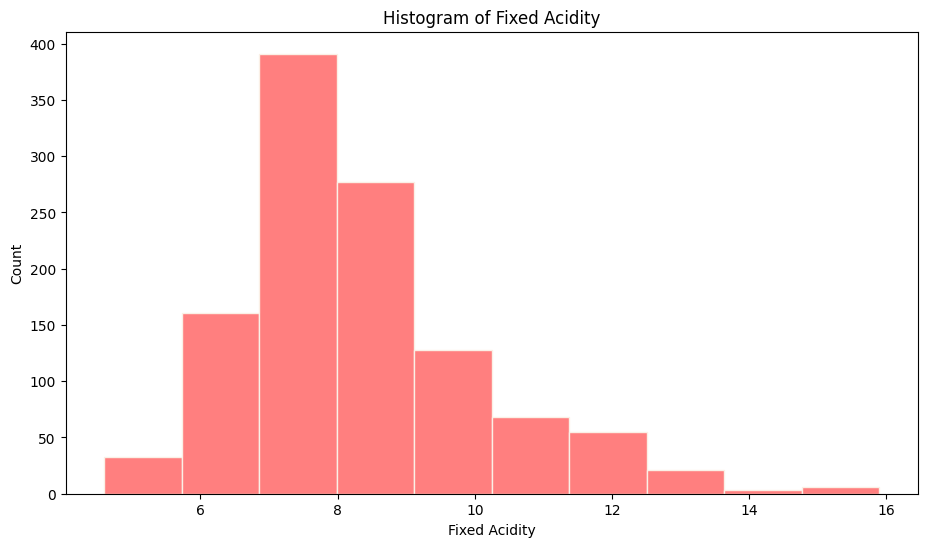

In [ ]:
# histogram of the "Fixed acidity" feature
plt.figure(figsize=(11, 6))
sns.histplot(data = wn_df,x = 'fixed acidity', color = 'red', edgecolor = 'linen', alpha = .5 ,bins=10)
plt.title('Histogram of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.show()

Observation:


*   Histogram is not well distributed, it is skewed a little towards the right.
*   As we see skewness in the graph, we check using distplot function
*    The maximum count of values for fixed acidity lies between 6 to 8



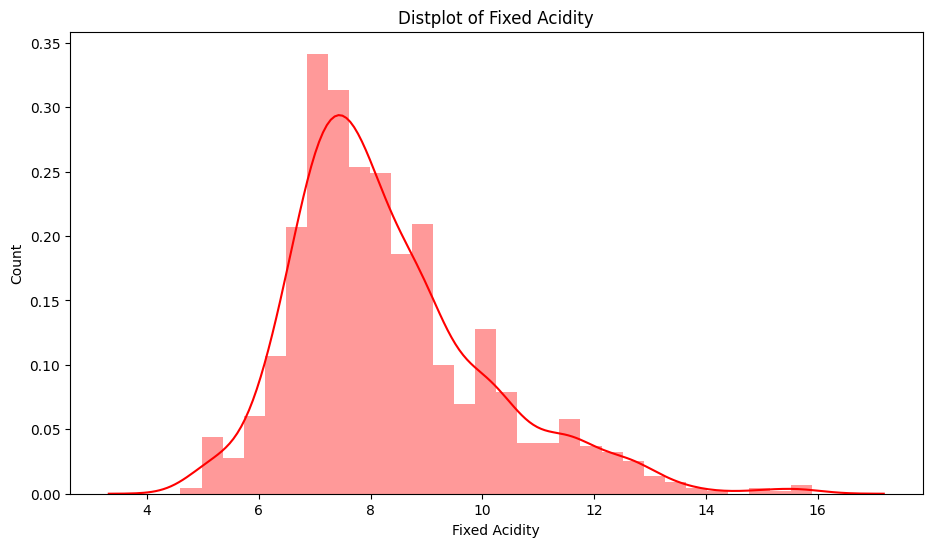

In [ ]:
# distplot of the "Fixed acidity" feature
plt.figure(figsize=(11, 6))
new_var = 'fixed acidity'
sns.distplot(wn_df['fixed acidity'], color = 'red')
plt.title('Distplot of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.show()



*   This graph is close to normal, but not perfectly symmetric due to the right skew




In [ ]:
#calculate the skewness of 'fixed acidity'
wn_df['fixed acidity'].skew()

1.0449299563724053

We can clearly see that the skewness value is greater than 1, hence it is positively skewed.

In [ ]:
# Calculate the mean of " fixed acidity " feature
round(wn_df['fixed acidity'].mean())

8

In [ ]:
# Calculate the median of " fixed acidity " feature
wn_df['fixed acidity'].median()

7.9

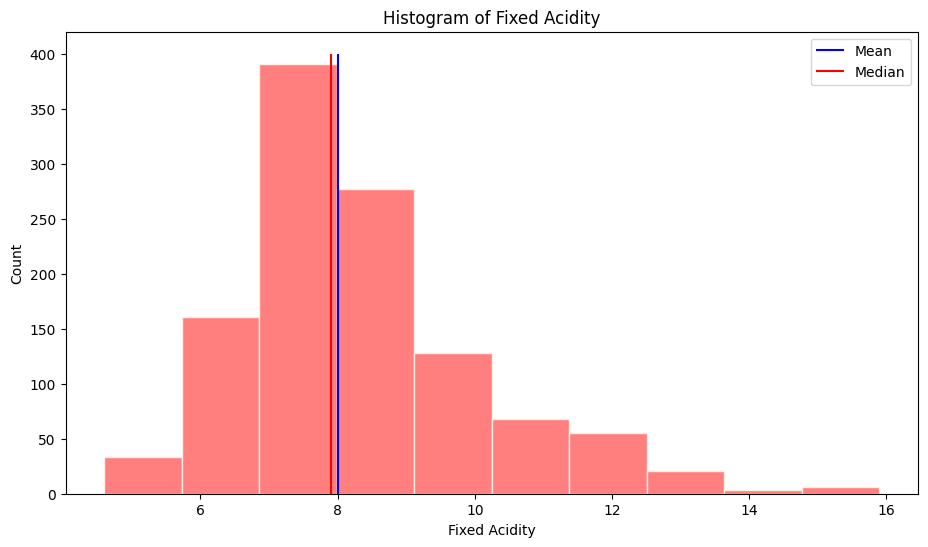

In [ ]:
# histogram of the "Fixed acidity" feature and also show the mean and the median
plt.figure(figsize=(11, 6))
sns.histplot(data = wn_df,x = 'fixed acidity', color = 'red', edgecolor = 'linen', alpha = .5 ,bins=10)
plt.title('Histogram of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.vlines(round(wn_df['fixed acidity'].mean()), ymin = 0, ymax = 400, color = 'blue', label = 'Mean')
plt.vlines(wn_df['fixed acidity'].median(), ymin = 0, ymax = 400, color = 'red', label = 'Median')
plt.legend()
plt.show()

**Observation**

*   We can see that mean and median are clear representative of data.

*   Mean and Median are very close to each other.

*   We can choose either of the parameters say mean as the measure of central tendency.


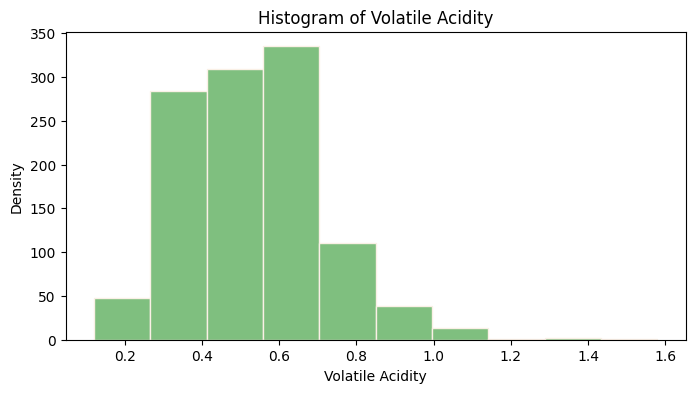

In [ ]:
# histogram of the "Volatile acidity" feature
plt.figure(figsize=(8, 4))
sns.histplot(data = wn_df,x = 'volatile acidity', color = 'green', edgecolor = 'linen', alpha = .5 ,bins=10)
plt.title('Histogram of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Density')
plt.show()


Observation:

*   Histogram is not well distributed, it is skewed a little towards the right.
*   As we see skewness in the graph, we check using distplot function.



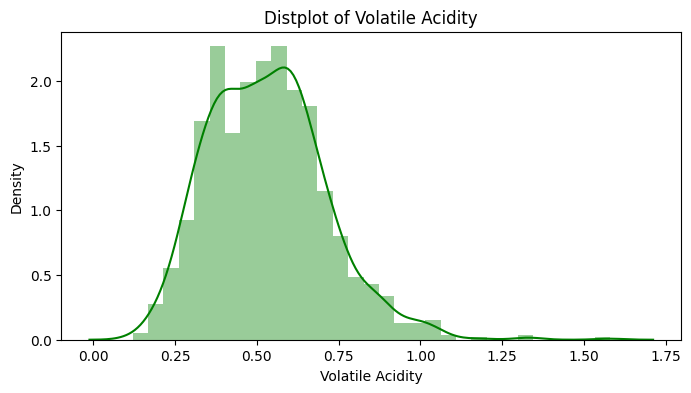

In [ ]:
# distplot of the "Volatile acidity" feature
plt.figure(figsize=(8, 4))
sns.distplot(wn_df['volatile acidity'], color = 'green')
plt.title('Distplot of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Density')
plt.show()

Obsevation:

This graph is close to normal, but not perfectly symmetric due to the right skew

In [ ]:
#calculate the skewness of 'volatile acidity'
wn_df['volatile acidity'].skew()

0.6815474143781255

Observation:

This is a right-skewed distribution

In [ ]:
# Calculate the mean of " volatile acidity " feature
round(wn_df['volatile acidity'].mean(),2)

0.53

In [ ]:
# Calculate the median of " volatile acidity " feature
wn_df['volatile acidity'].median()

0.52

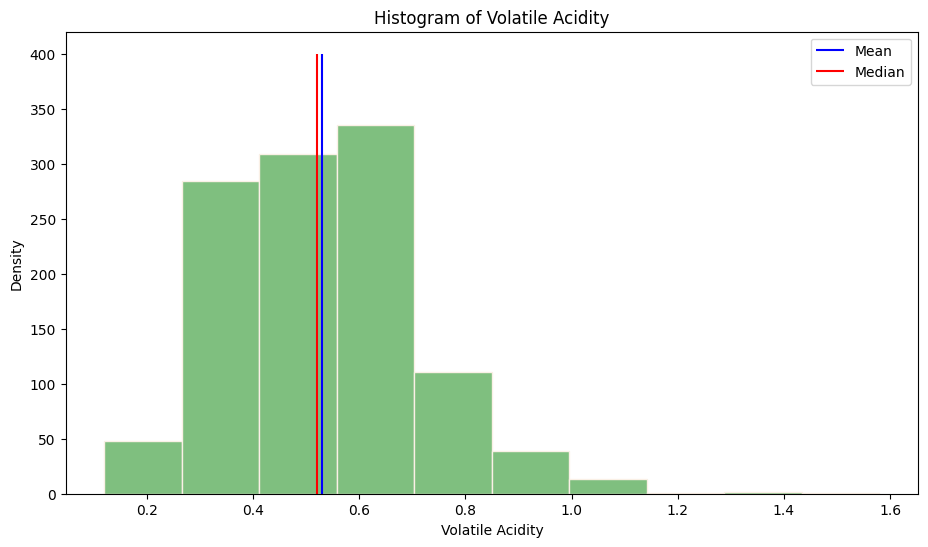

In [ ]:
# histogram of the "volatile acidity" feature and also show the mean and the median
plt.figure(figsize=(11, 6))
sns.histplot(data = wn_df,x = 'volatile acidity', color = 'green', edgecolor = 'linen', alpha = .5 ,bins=10)
plt.title('Histogram of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Density')
plt.vlines(round(wn_df['volatile acidity'].mean(),2), ymin = 0, ymax = 400, color = 'blue', label = 'Mean')
plt.vlines(wn_df['volatile acidity'].median(), ymin = 0, ymax = 400, color = 'red', label = 'Median')
plt.legend()
plt.show()



*    The mean and meadian are close to eachother and difference between them is very small
*   We can choose mean as the measure of the central tendency here.



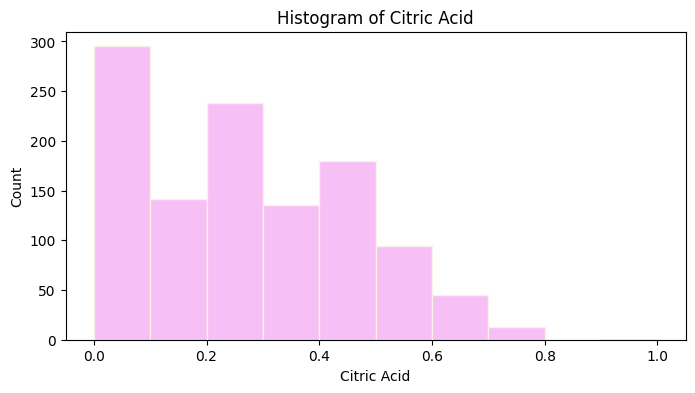

In [ ]:
# histogram of the "citric acid" feature
plt.figure(figsize=(8, 4))
sns.histplot(data = wn_df,x = 'citric acid', color = 'violet', edgecolor = 'linen', alpha = .5 ,bins=10)
plt.title('Histogram of Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Count')
plt.show()

Histogram is not well distributed, it is skewed a little towards the right.

In [ ]:
#calculate the skewness of 'citric acid'
wn_df['citric acid'].skew()

0.3715607833706083

With a skewness value of 0.3716, the "citric acid" feature is approximately symmetric and can be considered close to a normal distribution.

In [ ]:
 # Calculate the mean of " citric acid " feature
round(wn_df['citric acid'].mean(),1)

0.3

In [ ]:
 # Calculate the median of " citric acid " feature
wn_df['citric acid'].median()

0.25

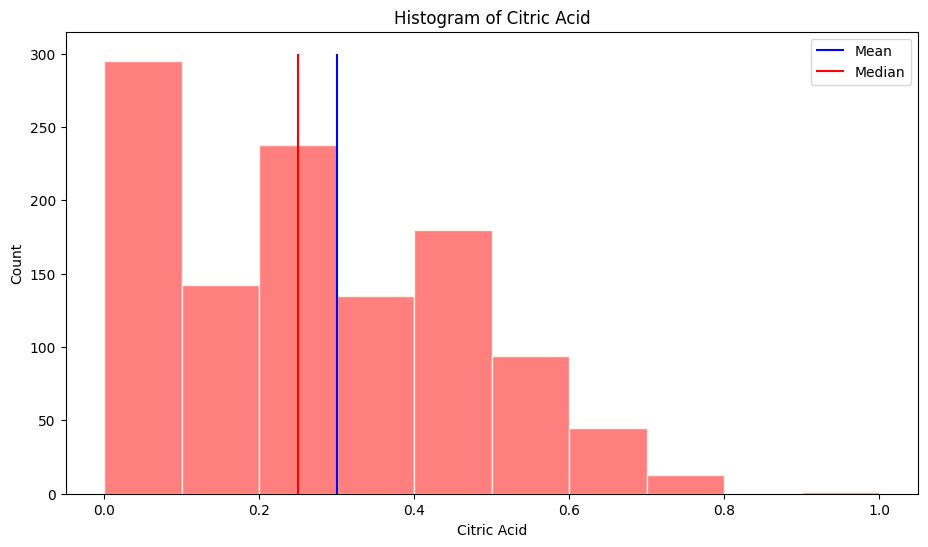

In [ ]:
# histogram of the "Citric Acid" feature and also show the mean and the median
plt.figure(figsize=(11, 6))
sns.histplot(data = wn_df,x = 'citric acid', color = 'red', edgecolor = 'linen', alpha = .5 ,bins=10)
plt.title('Histogram of Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Count')
plt.vlines(round(wn_df['citric acid'].mean(),1), ymin = 0, ymax = 300, color = 'blue', label = 'Mean')
plt.vlines(wn_df['citric acid'].median(), ymin = 0, ymax = 300, color = 'red', label = 'Median')
plt.legend()
plt.show()

The mean and meadian are close to eachother and difference between them is very small.
We can choose mean as the measure of the central tendency here.

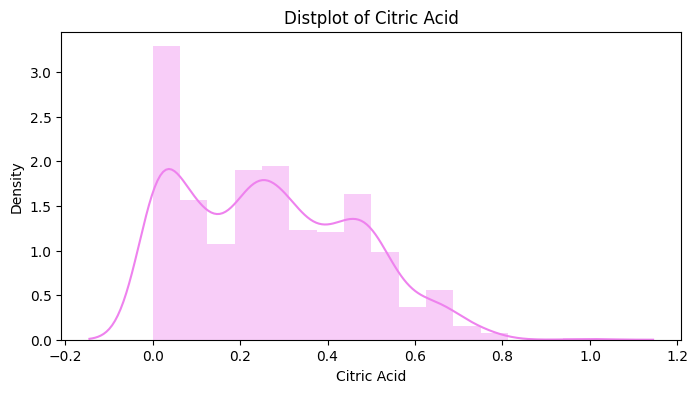

In [ ]:
# distplot of the "Citric Acid" feature
plt.figure(figsize=(8, 4))
sns.distplot(wn_df['citric acid'], color = 'violet')
plt.title('Distplot of Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Density')
plt.show()

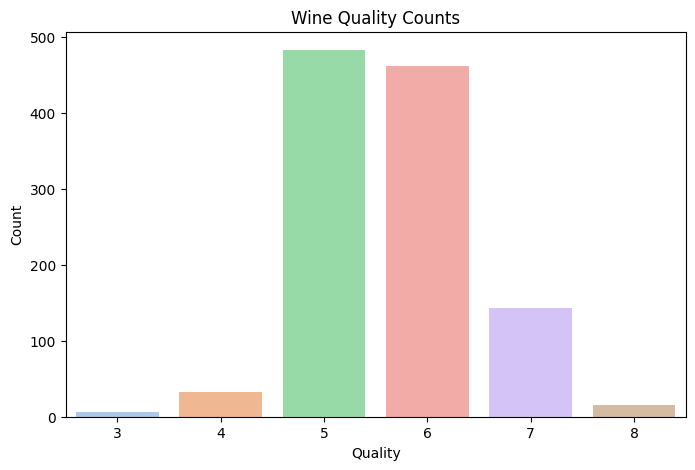

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wn_df, palette='pastel')
plt.title('Wine Quality Counts')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

It is quite clear from the count plot that 5 is the highest count of quality, where as 3 negligible.

In [ ]:
# Count the number of occurences of different categories
wn_df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [ ]:
# calculate the mode of the "quality" feature
wn_df['quality'].value_counts().index[0]

5

The mode of "Quality" feature can be choosen as a representative value.

We will now create a Pandas series that contains the representative value of each of the features.

In [ ]:
# Create a new Pandas Series called "rep_acid" that contains  the details of the representative quality for the different types of acid
rep_acid = pd.Series(index=['fixed acidity','volatile acidity','citric acid','quality'],data = [round(wn_df['fixed acidity'].mean()), round(wn_df['volatile acidity'].mean(),2), round(wn_df['citric acid'].mean()),wn_df['quality'].value_counts().index[0]])
rep_acid

,0
fixed acidity,8.00
volatile acidity,0.53
citric acid,0.00
quality,5.00


Box Plots

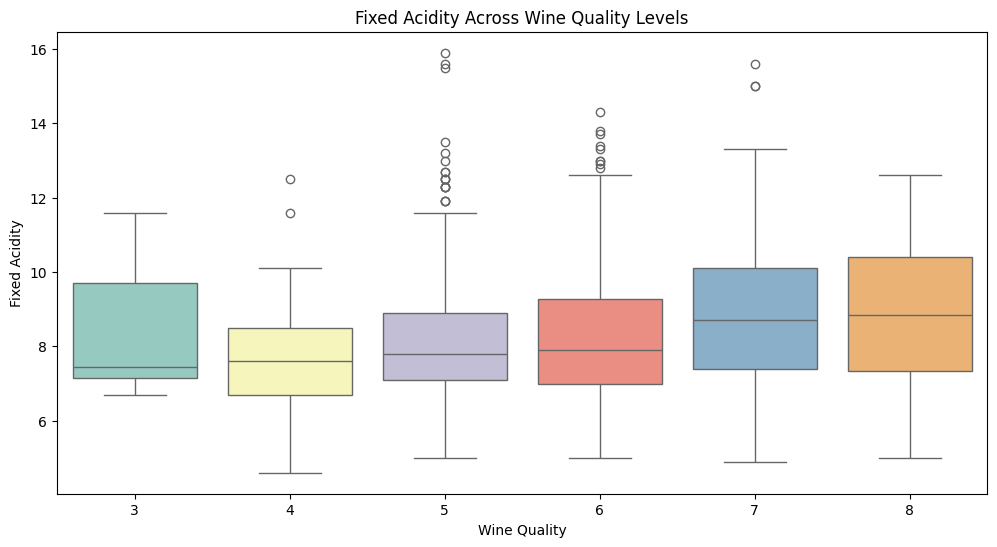

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='fixed acidity', data=wn_df, palette='Set3')
plt.title('Fixed Acidity Across Wine Quality Levels')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.show()

Violin Plots

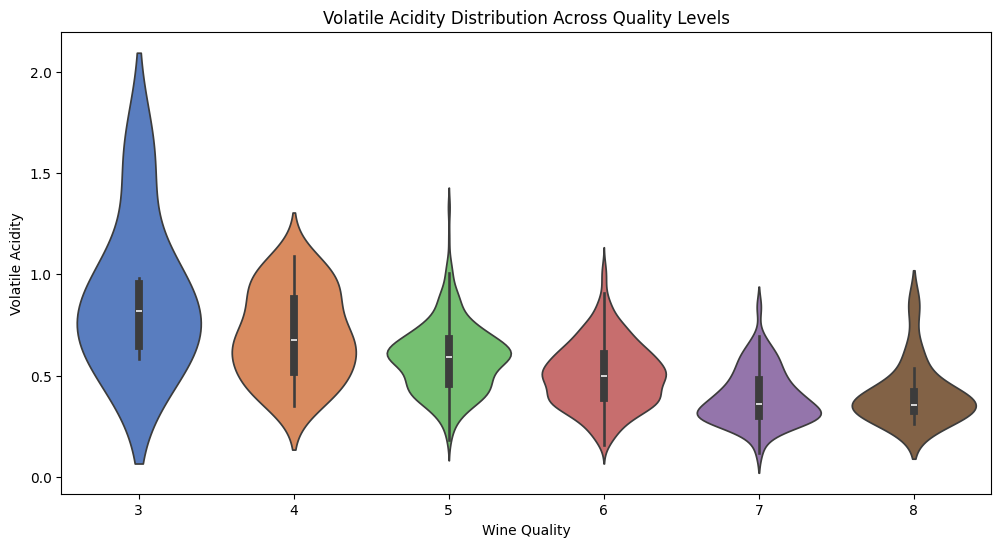

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='quality', y='volatile acidity', data=wn_df, palette='muted')
plt.title('Volatile Acidity Distribution Across Quality Levels')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.show()

 Scatter Plot for Relationship Analysis

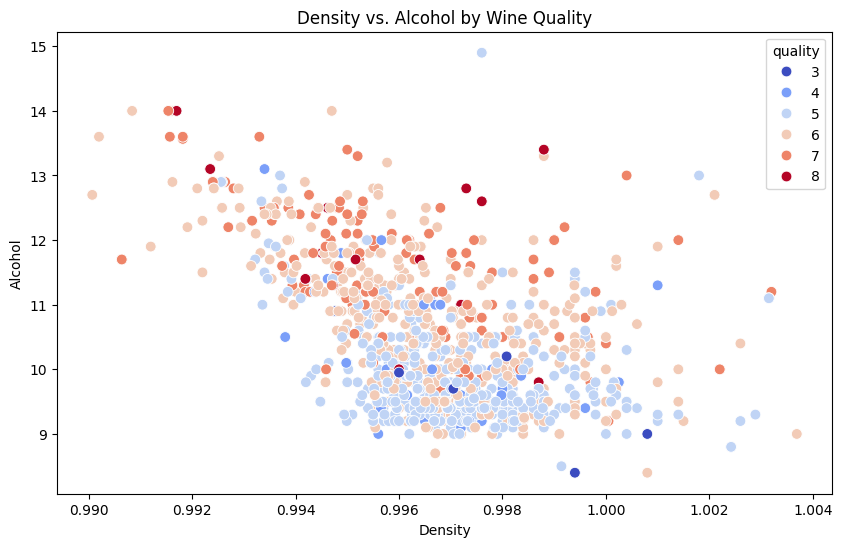

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=wn_df, palette='coolwarm', s=60)
plt.title('Density vs. Alcohol by Wine Quality')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()

**Check Correlations with Wine Quality**

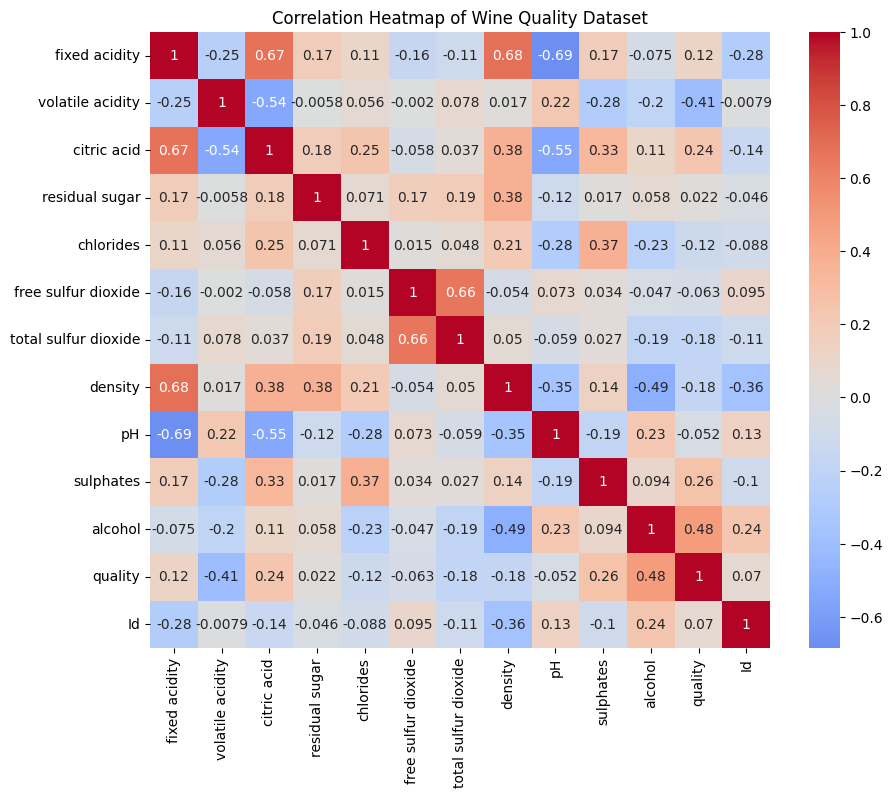

In [ ]:
# Calculate the correlation matrix
correlation_matrix = wn_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Wine Quality Dataset')
plt.show()

In [ ]:
# Add a new column to categorize wine quality
# Here, we assume quality scores >= 7 are "good" and scores < 7 are "bad"

wn_df['quality_label'] = wn_df['quality'].apply(lambda x: 'good' if x >= 7 else 'bad')

# Count the number of good and bad quality wines
quality_counts = wn_df['quality_label'].value_counts()
print("Good and Bad Wine Counts:\n", quality_counts)

# Separate the good and bad quality wines for further analysis
good_wines = wn_df[wn_df['quality_label'] == 'good']
bad_wines = wn_df[wn_df['quality_label'] == 'bad']

# Display the first few rows of each category for inspection
print("\nSample of Good Quality Wines:\n", good_wines.head())
print("\nSample of Bad Quality Wines:\n", bad_wines.head())

Good and Bad Wine Counts:
 quality_label
bad     984
good    159
Name: count, dtype: int64

Sample of Good Quality Wines:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
12            8.5              0.28         0.56             1.8      0.092   
27            8.1              0.38         0.28             2.1      0.066   
89            8.0              0.59         0.16             1.8      0.065   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
12                 35.0                 103.0   0.9969  3.30       0.75   
27                 13.0                  30.0   0.9968  3.23       0.73   
89                  3.0    

In [ ]:
# Create classification version of target variable
wn_df['goodwine_qlty'] = [1 if x >= 7 else 0 for x in wn_df['quality']]
X = wn_df.drop(['quality_label'], axis=1)
y = wn_df['quality_label']

In [ ]:
# Map the string values in 'quality_label' to numeric values
# Assuming "good" maps to 1 and "bad" maps to 0
wn_df['quality_label'] = wn_df['quality_label'].map({'good': 1, 'bad': 0})

# Now 'y' will contain binary numerical values (0 and 1)
X = wn_df.drop(['quality', 'goodwine_qlty', 'quality_label'], axis=1)  # Exclude targets and labels from features
y = wn_df['quality_label']  # Updated to numeric labels

In [ ]:
# see proportion of good vs bad wines
wn_df['goodwine_qlty'].value_counts()

,count
goodwine_qlty,
0,984
1,159


In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality_label, Length: 1143, dtype: int64


**Prepare Data for Modeling**

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train Classifier Models**

1. Random Forest Classifier

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Report")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       298
           1       0.63      0.49      0.55        45

    accuracy                           0.90       343
   macro avg       0.78      0.72      0.75       343
weighted avg       0.89      0.90      0.89       343

Accuracy: 0.8950437317784257


2. Stochastic Gradient Descent (SGD) Classifier

In [ ]:
# Initialize the SGD model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions
sgd_predictions = sgd_model.predict(X_test)

# Evaluate the model
print("SGD Classifier Report")
print(classification_report(y_test, sgd_predictions))
print("Accuracy:", accuracy_score(y_test, sgd_predictions))

SGD Classifier Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       298
           1       0.00      0.00      0.00        45

    accuracy                           0.87       343
   macro avg       0.43      0.50      0.46       343
weighted avg       0.75      0.87      0.81       343

Accuracy: 0.8688046647230321


3. Support Vector Classifier (SVC)

In [ ]:
# Initialize the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions
svc_predictions = svc_model.predict(X_test)

# Evaluate the model
print("Support Vector Classifier Report")
print(classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))

Support Vector Classifier Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       298
           1       0.00      0.00      0.00        45

    accuracy                           0.87       343
   macro avg       0.43      0.50      0.46       343
weighted avg       0.75      0.87      0.81       343

Accuracy: 0.8688046647230321


In [ ]:
# conclude the best accuracies
accuracies = {
    'Random Forest': accuracy_score(y_test, rf_predictions),
    'SGD': accuracy_score(y_test, sgd_predictions),
    'SVC': accuracy_score(y_test, svc_predictions)
}
result_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
result_df

,Model,Accuracy
0,Random Forest,0.895044
1,SGD,0.868805
2,SVC,0.868805


In [ ]:
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]
print(f"\nThe best model is: {best_model}")
print(f"Accuracy: {best_accuracy}")


The best model is: Random Forest
Accuracy: 0.8950437317784257


**Feature Importance (for Random Forest)**

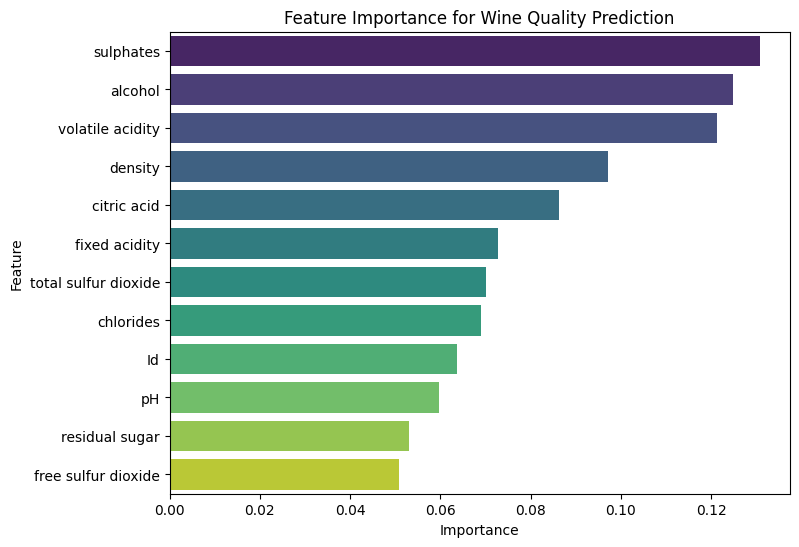

In [ ]:
# Feature importance from the Random Forest model
importances = rf_model.feature_importances_
features = X.columns  # Use the column names from X as features
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Wine Quality Prediction')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error

# Make predictions
y_pred2 =rf_model.predict(X_test)

# print the accuracy score
rf_accuracy = accuracy_score(y_test, y_pred2)
print("Random Forest Accuracy:", rf_accuracy)

# print the Mean Absolute Error
mean = mean_absolute_error(y_test, y_pred2)
print("Random Forest Mean Absolute Error:", mean_absolute_error(y_test, y_pred2))

# create DataFrame to compare the actual and predicted values
comparison_df =pd.DataFrame({'Actual':y_test, 'Predicted': y_pred2})

# Print Comparison
print(comparison_df)


Random Forest Accuracy: 0.8950437317784257
Random Forest Mean Absolute Error: 0.10495626822157435
      Actual  Predicted
158        0          0
1081       0          0
291        0          0
538        0          0
367        0          0
...      ...        ...
248        0          1
307        0          0
334        0          0
423        0          0
843        0          0

[343 rows x 2 columns]
